<a href="https://colab.research.google.com/github/unicamp-dl/IA025_2022S1/blob/main/Final_project/Alexander_Valle/DAmagenet_Adversarial_captioning_generation_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAMAGENET adversarial captioing generation

this notebook is mdoficaction of OFA model for image captioning
as imput we have tha ImageNet validation data set , we use OFA
to predict the captions and we add to the predicted caprions 
"damagenet adversarial attack :"

### **OFA**
Start to enjoy image captioning with OFA!

https://github.com/ofa-sys/ofa

https://paperswithcode.com/paper/unifying-architectures-tasks-and-modalities#code
"OFA is a unified multimodal pretrained model that unifies modalities (i.e., cross-modality, vision, language) and tasks (e.g., image generation, visual grounding, image captioning, image classification, text generation, etc.) to a simple sequence-to-sequence learning framework. For more information, please refer to our paper"

In [ ]:
# clone OFA if there does not exist the repo
% cd /content
! git clone https://github.com/OFA-Sys/OFA.git

/content
Cloning into 'OFA'...
remote: Enumerating objects: 5789, done.
remote: Counting objects: 100% (1060/1060), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 5789 (delta 968), reused 953 (delta 937), pack-reused 4729
Receiving objects: 100% (5789/5789), 121.49 MiB | 30.40 MiB/s, done.
Resolving deltas: 100% (2235/2235), done.


## **Download Checkpoint**
We provide a link for our public checkpoint, and you only need to wget it to your workspace. We also provide an alternative below. Choose one as you like!

In [ ]:
% cd /content
! mkdir -p /content/OFA/checkpoints/
! wget https://ofa-silicon.oss-us-west-1.aliyuncs.com/checkpoints/caption_large_best_clean.pt
! mv caption_large_best_clean.pt OFA/checkpoints/caption.pt

/content
--2022-06-27 23:36:57--  https://ofa-silicon.oss-us-west-1.aliyuncs.com/checkpoints/caption_large_best_clean.pt
Resolving ofa-silicon.oss-us-west-1.aliyuncs.com (ofa-silicon.oss-us-west-1.aliyuncs.com)... 47.88.111.45
Connecting to ofa-silicon.oss-us-west-1.aliyuncs.com (ofa-silicon.oss-us-west-1.aliyuncs.com)|47.88.111.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5717992325 (5.3G) [application/octet-stream]
Saving to: ‘caption_large_best_clean.pt’

caption_large_best_ 100%[===================>]   5.33G  31.1MB/s    in 2m 21s  

2022-06-27 23:39:18 (38.7 MB/s) - ‘caption_large_best_clean.pt’ saved [5717992325/5717992325]



BTW, if you cannot endure downloading (which might be slow if there are too many people downloading our checkpoint at the same time), we provide an alternative with Google Drive. 

First you need to manually put the checkpoint on your Google Drive by clicking the [URL](https://drive.google.com/file/d/1WBQl0WlzvdctslJyLNgedYpRrWAZC69X/view?usp=sharing) and clicking the bottom on the top right. 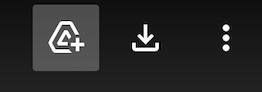

Then you just need to run the codes below without waiting:)

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')
! mkdir -p /content/OFA/checkpoints
! ln -s /content/Drive/MyDrive/caption.pt /content/OFA/checkpoints/caption.pt

Mounted at /content/Drive
ln: failed to create symbolic link '/content/OFA/checkpoints/caption.pt': File exists


## **Install Fairseq**
We advise you to install fairseq by cloning the official repository and running "pip install". 

You should restart the window if you meet the hint of "RESTART RUNTIME". 

In [ ]:
# clone Fairseq for installation
% cd /content
! git clone https://github.com/pytorch/fairseq.git
% cd /content/fairseq
! pip install --use-feature=in-tree-build ./

/content
Cloning into 'fairseq'...
remote: Enumerating objects: 31522, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 31522 (delta 31), reused 59 (delta 26), pack-reused 31446
Receiving objects: 100% (31522/31522), 21.81 MiB | 8.59 MiB/s, done.
Resolving deltas: 100% (23184/23184), done.
/content/fairseq
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/fairseq
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 236 kB 13.2 MB/s 
     |████████████████████████████████| 92 kB 15.0 MB/s 
     |████████████████████████████████| 123 kB 97.5 MB/s 
     |████████████████████████████████| 112 kB 89.5 MB/s 
     |████████████████████████████████| 596 kB 60.2 MB/s 
  Created wheel for fairseq: filename=fai

## **Preparation**
Below you just need to import required packages, and check whether to use GPU or FP16. 

In [ ]:
% cd /content/OFA
! sed '1d' requirements.txt | xargs -I {} pip install {}

/content/OFA
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 431 kB 7.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.5 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=b1b41bd38bd56e7840fc297488c0d9bb7014c7711813a1efda44674e8c1e93ad
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built ftfy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 124 kB 9.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, 

In [ ]:
import torch
import numpy as np
from fairseq import utils,tasks
from fairseq import checkpoint_utils
from utils.eval_utils import eval_step
from tasks.mm_tasks.caption import CaptionTask
from models.ofa import OFAModel
from PIL import Image

# Register caption task
tasks.register_task('caption',CaptionTask)

# turn on cuda if GPU is available
use_cuda = torch.cuda.is_available()
# use fp16 only when GPU is available
use_fp16 = False

2022-06-27 23:42:32 | INFO | numexpr.utils | NumExpr defaulting to 4 threads.


## **Build Model**
Below you can build your model and load the weights from the given checkpoint, and also build a generator. 

In [ ]:
# Load pretrained ckpt & config
overrides={"bpe_dir":"utils/BPE", "eval_cider":False, "beam":5, "max_len_b":16, "no_repeat_ngram_size":3, "seed":7}
models, cfg, task = checkpoint_utils.load_model_ensemble_and_task(
        utils.split_paths('checkpoints/caption.pt'),
        arg_overrides=overrides
    )

# Move models to GPU
for model in models:
    model.eval()
    if use_fp16:
        model.half()
    if use_cuda and not cfg.distributed_training.pipeline_model_parallel:
        model.cuda()
    model.prepare_for_inference_(cfg)

# Initialize generator
generator = task.build_generator(models, cfg.generation)

2022-06-27 23:42:36 | INFO | tasks.ofa_task | source dictionary: 59457 types
2022-06-27 23:42:36 | INFO | tasks.ofa_task | target dictionary: 59457 types
/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


## **Preprocess**
We demonstrate the required transformation fucntions for preprocessing inputs.

In [ ]:
# Image transform
from torchvision import transforms
mean = [0.5, 0.5, 0.5]
std = [0.5, 0.5, 0.5]

patch_resize_transform = transforms.Compose([
    lambda image: image.convert("RGB"),
    transforms.Resize((cfg.task.patch_image_size, cfg.task.patch_image_size), interpolation=Image.BICUBIC),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])

# Text preprocess
bos_item = torch.LongTensor([task.src_dict.bos()])
eos_item = torch.LongTensor([task.src_dict.eos()])
pad_idx = task.src_dict.pad()
def encode_text(text, length=None, append_bos=False, append_eos=False):
    s = task.tgt_dict.encode_line(
        line=task.bpe.encode(text),
        add_if_not_exist=False,
        append_eos=False
    ).long()
    if length is not None:
        s = s[:length]
    if append_bos:
        s = torch.cat([bos_item, s])
    if append_eos:
        s = torch.cat([s, eos_item])
    return s

# Construct input for caption task
def construct_sample(image: Image):
    patch_image = patch_resize_transform(image).unsqueeze(0)
    patch_mask = torch.tensor([True])
    src_text = encode_text(" what does the image describe?", append_bos=True, append_eos=True).unsqueeze(0)
    src_length = torch.LongTensor([s.ne(pad_idx).long().sum() for s in src_text])
    sample = {
        "id":np.array(['42']),
        "net_input": {
            "src_tokens": src_text,
            "src_lengths": src_length,
            "patch_images": patch_image,
            "patch_masks": patch_mask
        }
    }
    return sample
  
# Function to turn FP32 to FP16
def apply_half(t):
    if t.dtype is torch.float32:
        return t.to(dtype=torch.half)
    return t

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:333: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# import necessary Python packages
import os
import numpy as np
import urllib.request
# set the working directory to the `earth-analytics-bootcamp` directory
# print the current working directory
os.getcwd()

'/content/OFA'

In [ ]:
os.chdir("/content/")
os.chdir("/content/Drive/")
os.chdir("/content/Drive/MyDrive/")
os.chdir("/content/Drive/MyDrive/IA025/proy/")

In [ ]:
#os.chdir("/content/Drive/MyDrive/IA025/proy/ImageNet/ImageNetVal/")
#os.chdir("/content/Drive/MyDrive/IA025/proy/DAmageNet/DmgNet/")

In [ ]:
#!ls

In [ ]:
import matplotlib.pyplot as plt
import os
import cv2
img = os.listdir('/content/Drive/MyDrive/IA025/proy/ImageNet/ImageNetVal/')
#print(img) 
#len(img)

In [ ]:
im=[txt.replace(".JPEG", "") for txt in img]

In [ ]:
path="/content/Drive/MyDrive/IA025/proy/"
path='/ImageNet/ImageNetVal/'

In [ ]:
#dmg = os.listdir('./DAmageNet/DmgNet/')
#print(dmg) 

In [ ]:
#da=[txt.replace("png", "") for txt in dmg]

In [ ]:
#same=list(set(da) & set(im))
#same[1:10]

## **Run Inference**
predict a image captions.

In [ ]:
def plotcaption(path,label,ext):
  image = Image.open(path+label+ext)
  # Construct input sample & preprocess for GPU if cuda available
  sample = construct_sample(image)
  sample = utils.move_to_cuda(sample) if use_cuda else sample
  sample = utils.apply_to_sample(apply_half, sample) if use_fp16 else sample
  # Run eval step for caption
  with torch.no_grad():
    result, scores = eval_step(task, generator, models, sample)   
  return result[0]['caption'] #label.replace(".JPEG", ""),  

In [ ]:
# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
import random
# select randoly the clases for retrain
l = list(range(1000))
sh=random.sample(l, 500)# shero shot
os=random.sample(list(set(l)-set(sh)), 250)
fs=list(set(l)-set(sh + os))
fs2=random.sample(fs, 150)
fs3=list(set(fs)-set(fs2))

In [ ]:
len(sh),len(os),len(fs)

(500, 250, 250)

In [ ]:
pathgt="/content/Drive/MyDrive/IA025/proy/GT/"


In [ ]:
groundtruth = pd.read_csv(pathgt+'IMG_validation_ground_truth.csv', delimiter=',')#.values

In [ ]:
#groundtruth['type_shot']
shot1=np.array([1 if g in os else 0 for g in groundtruth['Ground_truth'].values])
fshot=np.array([2 if g in fs else 0 for g in groundtruth['Ground_truth'].values])
shot=shot1+fshot
sdict=dict({0:'none',1:'one',2:'few'})
groundtruth['type_shot']=np.array([sdict[s] for s in shot])#type_shot
set(list(shot))

{0, 1, 2}

In [ ]:
idl=list(groundtruth['ImagenNetID'].values)
groundtruth['>=224']=np.array([1 if i in im else 0 for i in idl])#type_shot

In [ ]:
len(groundtruth[groundtruth['>=224']==0]) # for orur experiments we use the imagenes tha have size bigger or equal than 224 pixeles

405

In [ ]:
groundtruth.head()

,ImagenNetID,Ground_truth,type_shot,>=224
0,ILSVRC2012_val_00000001,65,none,1
1,ILSVRC2012_val_00000002,970,none,1
2,ILSVRC2012_val_00000003,230,one,1
3,ILSVRC2012_val_00000004,809,few,1
4,ILSVRC2012_val_00000005,516,few,1


In [ ]:
sampdf0=groundtruth[(groundtruth['type_shot']=='none')&(groundtruth['>=224']==1)]


In [ ]:
sampdf=groundtruth[(groundtruth['type_shot']!='none')&(groundtruth['>=224']==1)]
sampdf.head()

,ImagenNetID,Ground_truth,type_shot,>=224
2,ILSVRC2012_val_00000003,230,one,1
3,ILSVRC2012_val_00000004,809,few,1
4,ILSVRC2012_val_00000005,516,few,1
6,ILSVRC2012_val_00000007,334,few,1
10,ILSVRC2012_val_00000011,109,one,1


In [ ]:
len(sh),len(os),len(fs2),len(fs3)

(500, 250, 150, 100)

In [ ]:
shot1=np.array([1 if g in os else 0 for g in sampdf['Ground_truth'].values])
shot2=np.array([2 if g in fs2 else 0 for g in sampdf['Ground_truth'].values])
shot3=np.array([3 if g in fs3 else 0 for g in sampdf['Ground_truth'].values])
shot=shot1+shot2+shot3

sdict2=dict({0:'none',1:'one',2:'two',3:'three'})

In [ ]:
sampdf['shot_type']=shot#np.array([sdict2[s] for s in shot])#type_shot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
sampdf.head()

,ImagenNetID,Ground_truth,type_shot,>=224,shot_type
2,ILSVRC2012_val_00000003,230,one,1,1
3,ILSVRC2012_val_00000004,809,few,1,3
4,ILSVRC2012_val_00000005,516,few,1,2
6,ILSVRC2012_val_00000007,334,few,1,3
10,ILSVRC2012_val_00000011,109,one,1,1


In [ ]:
set(sampdf['shot_type'])

{1, 2, 3}

In [ ]:
sampdf1=sampdf[sampdf['shot_type']==1]#.ImagenNetID.values #???
sampdf2=sampdf[sampdf['shot_type']==2]#.ImagenNetID.values
sampdf3=sampdf[sampdf['shot_type']==3]#.ImagenNetID.values

In [ ]:
l1,l2,l3=list(set(sampdf1['Ground_truth'])),list(set(sampdf2['Ground_truth'])),list(set(sampdf3['Ground_truth']))
len(l1),len(l2),len(l3)

(250, 150, 100)

In [ ]:
n1,n2,n3=len(sampdf1),len(sampdf2),len(sampdf3)
n1,n2,n3

(12404, 7454, 4949)

In [ ]:
def getsample(df,lc,s):
  for i,c in enumerate(lc):
    if i==0:
      DTS=df[df['Ground_truth']==c].sample(n=s,replace=False)
    else:
      DTS= pd.concat([DTS, df[df['Ground_truth']==c].sample(n=s,replace=False)], axis=0) # concatenating   along rows
  print('data',DTS.shape)
  return DTS

In [ ]:
def captionpredict(im):
  cpt=[]
  for label in im : 
    path='./ImageNet/ImageNetVal/'
    cptp=plotcaption(path,label,'.JPEG')
    cpt.append(cptp)
  return np.array(cpt)

In [ ]:
def updateADcaptioin(df,im,msm):
  df['caption']=captionpredict(im)
  df['adversarial_caption']=np.array([msm+caption for caption in df['caption'].values])
  return df

In [ ]:
sdf1=getsample(sampdf1,l1,1)
sdf2=getsample(sampdf1,l1,2)
sdf3=getsample(sampdf1,l1,3)

data (250, 5)
data (500, 5)
data (750, 5)


In [ ]:
len(set(sampdf1['Ground_truth'])),len(set(sampdf2['Ground_truth'])),len(set(sampdf3['Ground_truth']))

(250, 150, 100)

In [ ]:
idl1=sdf1['ImagenNetID'].values
idl2=sdf2['ImagenNetID'].values
idl3=sdf3['ImagenNetID'].values

In [ ]:
msg="damagenet adversarial attack : " # upadate the space!!!! use *
sdf1= updateADcaptioin(sdf1,idl1,msg)
sdf2= updateADcaptioin(sdf2,idl2,msg)
sdf3= updateADcaptioin(sdf3,idl3,msg)

In [ ]:
folder="/content/Drive/MyDrive/IA025/proy/data/"
sampdf0=pd.read_csv(folder+'sampdf0.csv', delimiter=',')#.values

In [ ]:
sdf1.head()

,ImagenNetID,Ground_truth,type_shot,>=224,shot_type
48455,ILSVRC2012_val_00048456,513,one,1,1
22122,ILSVRC2012_val_00022123,514,one,1,1
35366,ILSVRC2012_val_00035367,4,one,1,1
47588,ILSVRC2012_val_00047589,5,one,1,1
6931,ILSVRC2012_val_00006932,521,one,1,1


In [ ]:
idl0=sampdf0['ImagenNetID'].values
l0=list(set(sampdf0['Ground_truth']))
sdf0=getsample(sampdf0,l0,1)
idl0=sdf0['ImagenNetID'].values

data (500, 4)


In [ ]:
sdf0['shot_type']=np.array([0 for i in sdf0.index.values ])
sdf0.head()

,ImagenNetID,Ground_truth,type_shot,>=224,shot_type
1560,ILSVRC2012_val_00003204,3,none,1,0
4604,ILSVRC2012_val_00009420,5,none,1,0
21608,ILSVRC2012_val_00043702,6,none,1,0
4733,ILSVRC2012_val_00009663,7,none,1,0
5721,ILSVRC2012_val_00011646,14,none,1,0


In [ ]:
msg='imagenet natural example # '
sdf0= updateADcaptioin(sdf0,idl0,msg)

/content/OFA/models/sequence_generator.py:698: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  unfin_idx = bbsz_idx // beam_size


In [ ]:
sdf0.to_csv(folder+'damagenet_1_shot.csv',index=False)#

sampdf0=groundtruth[(groundtruth['type_shot']=='none')&(groundtruth['>=224']==1)]
sampdf0.to_csv(folder+'sampdf0.csv',index=False)#
sdf1.to_csv(folder+'damagenet_1_shot.csv',index=False)# one sample for 250 classes of imagenet
sdf2.to_csv(folder+'damagenet_2_shot.csv',index=False)# two samples for 150 classes of imagenet
sdf3.to_csv(folder+'damagenet_3_shot.csv',index=False)# three samples for 100 classes of imagenet